# GHCN Temperature anomaly dataset analysis -- in Octave

GHCN is a large matrix of global historical temperature data, from 1880 to 2016
(it is freely available; we downloaded it from <a href="ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/grid/">ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/grid/</a>).
A not-very-easy-to-read technical paper describing the dataset is at
<a href="http://onlinelibrary.wiley.com/doi/10.1029/2011JD016187/pdf">http://onlinelibrary.wiley.com/doi/10.1029/2011JD016187/pdf</a>).

The data stores values for the whole globe using a grid, which has a resolution of $5^{\circ} \times 5^{\circ}$.
In other words, the grid has 36 rows (for latitude) and 72 columns (for longitude).
Although the earth is spherical and a $36 \times 72$ rectangular grid introduces distortion,
for this problem we will follow this approach.

The GHCN dataset covers $2016 - 1880 + 1 = 137$ years, with 12 months per year.
So the data set contains $137 \times 12$ grids.
The <tt>ghcn.csv</tt> file storing the data is basically a $(36 \times 12 \times 137) \times 72$ matrix of temperature values.
It is stored as a 2D matrix of size $(36 \times 12 \times 137) \times 72$ matrix, along with two initial columns giving the year and month.

The script <tt>ghcn_script.py</tt> reads in the data file and reshapes it for you
into a 4D matrix of size $36 \times 12 \times 137 \times 72$.

Actually, the GHCN data gives "anomaly" values instead of temperature values.
That is, it gives values of how far the temperature was from normal in that grid square in that month.
Positive values are above normal; all values are in Celsius.
(Why does it give anomaly values only?  The paper explains why computing actual temperatures is much harder.)

The point of this dataset in the assignment is that it permits us to use "slices" to do a lot of work.
For example, it turns out the coordinates of most of the continental U.S. are the rectangle
with rows 9:12 and columns 14:20  [in Python these are 8:11 and 13:19].


-- D.S. Parker, Fall 2016.

In [1]:
GHCN = csvread('ghcn.csv');

%   The data was artificially shifted to [0, 4500];
%     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
%     Since our focus here is on warming, we ignore temperatures below -5.
%   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN(:,3:74) - 2500) / 100;

In [2]:
temperature_anomaly = reshape( GHCN_in_centigrade, [36, 12, 137, 72] );   % convert to a 4D matrix, so we can use slices
size( temperature_anomaly )

ans =

    36    12   137    72



In [3]:
number_of_all_GHCN_values = prod(size( temperature_anomaly ))
number_of_all_GHCN_values

number_of_all_GHCN_values =  4261248
number_of_all_GHCN_values =  4261248


In [4]:
missing_values = (temperature_anomaly == -25);
number_of_missing_values = sum(sum(sum(sum( missing_values ))));

In [5]:
maximum_anomaly_value = max(max(max(max( temperature_anomaly ))))
minimum_anomaly_value = min(min(min(min( temperature_anomaly .*  (~ missing_values) ))))  %  '~' is 'not' in MATLAB

maximum_anomaly_value =  19.940
minimum_anomaly_value = -24.260


In [6]:
US_latitude  = 9:12
US_longitude = 15:20
my_years = 1916:2015
my_slice = temperature_anomaly( US_latitude, :, my_years - 1880 + 1, US_longitude );

US_latitude =

    9   10   11   12

US_longitude =

   15   16   17   18   19   20

my_years =

 Columns 1 through 11:

   1916   1917   1918   1919   1920   1921   1922   1923   1924   1925   1926

 Columns 12 through 22:

   1927   1928   1929   1930   1931   1932   1933   1934   1935   1936   1937

 Columns 23 through 33:

   1938   1939   1940   1941   1942   1943   1944   1945   1946   1947   1948

 Columns 34 through 44:

   1949   1950   1951   1952   1953   1954   1955   1956   1957   1958   1959

 Columns 45 through 55:

   1960   1961   1962   1963   1964   1965   1966   1967   1968   1969   1970

 Columns 56 through 66:

   1971   1972   1973   1974   1975   1976   1977   1978   1979   1980   1981

 Columns 67 through 77:

   1982   1983   1984   1985   1986   1987   1988   1989   1990   1991   1992

 Columns 78 through 88:

   1993   1994   1995   1996   1997   1998   1999   2000   2001   2002   2003

 Columns 89 through 99:

   2004   2005   2006   2007   2008   2009   20

In [7]:
total_number_of_grid_squares = length(US_latitude) * length(US_longitude) * 12
N = total_number_of_grid_squares

total_number_of_grid_squares =  288
N =  288


In [8]:
average_US_anomaly_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N

average_US_anomaly_by_year =

  -1.107500
  -1.908299
  -0.597604
  -0.696771
  -0.966806
   0.782604
  -0.241736
  -0.610451
  -1.507292
  -0.287986
  -0.816076
  -0.471042
  -0.589097
  -1.351042
  -0.275729
   0.801979
  -0.531111
   0.240833
   0.518958
  -0.502465
  -0.577292
  -0.764028
   0.394271
   0.270625
  -0.766458
   0.110104
  -0.454479
  -0.482500
  -0.279306
  -0.687569
   0.257569
  -0.568194
  -0.460347
  -0.261319
  -1.163819
  -1.175868
  -0.103993
   0.454583
   0.419028
  -0.355833
  -0.190312
  -0.405104
  -0.689132
  -0.543576
  -0.865208
  -0.579340
  -0.520799
  -0.260243
  -0.438472
  -0.726076
  -0.946076
  -0.775208
  -0.835278
  -0.803750
  -0.740000
  -0.557778
  -1.033993
  -0.149861
  -0.411146
  -0.605486
  -0.771736
  -0.070208
  -1.187118
  -1.375903
  -0.284757
   0.211424
  -0.839132
  -0.479618
  -0.341424
  -0.903264
   0.245660
   0.590590
  -0.147569
  -0.779028
   0.480139
   0.285451
  -0.344028
  -0.958958
  -0.055937
  -0.240625
  -0.95319

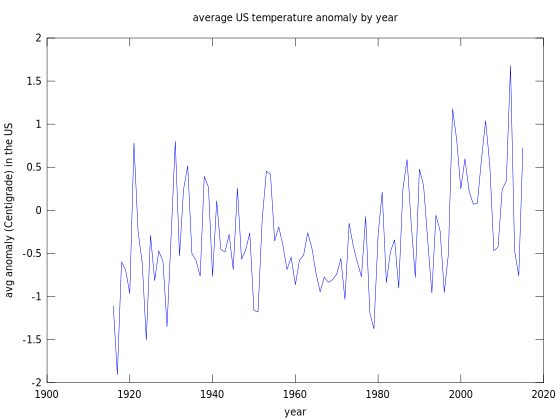

In [9]:
plot( my_years, average_US_anomaly_by_year )
xlabel('year')
ylabel('avg anomaly (Centigrade) in the US')
title('average US temperature anomaly by year')